In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [94]:
df.info

<bound method DataFrame.info of                  country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]>

In [95]:
df.shape

(167, 10)

In [96]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [97]:
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


# Exploratory Data Analysis

In [98]:
col = list(df.columns)
col.remove('country')
categorical_feaures = ['country']
numerical_features = [*col]
print('numerical_features:',*numerical_features)
print('categorical_features:', *categorical_feaures)

numerical_features: child_mort exports health imports income inflation life_expec total_fer gdpp
categorical_features: country


<ipython-input-99-d2a088836be2>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-99-d2a088836be2>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-99-d2a088836be2>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

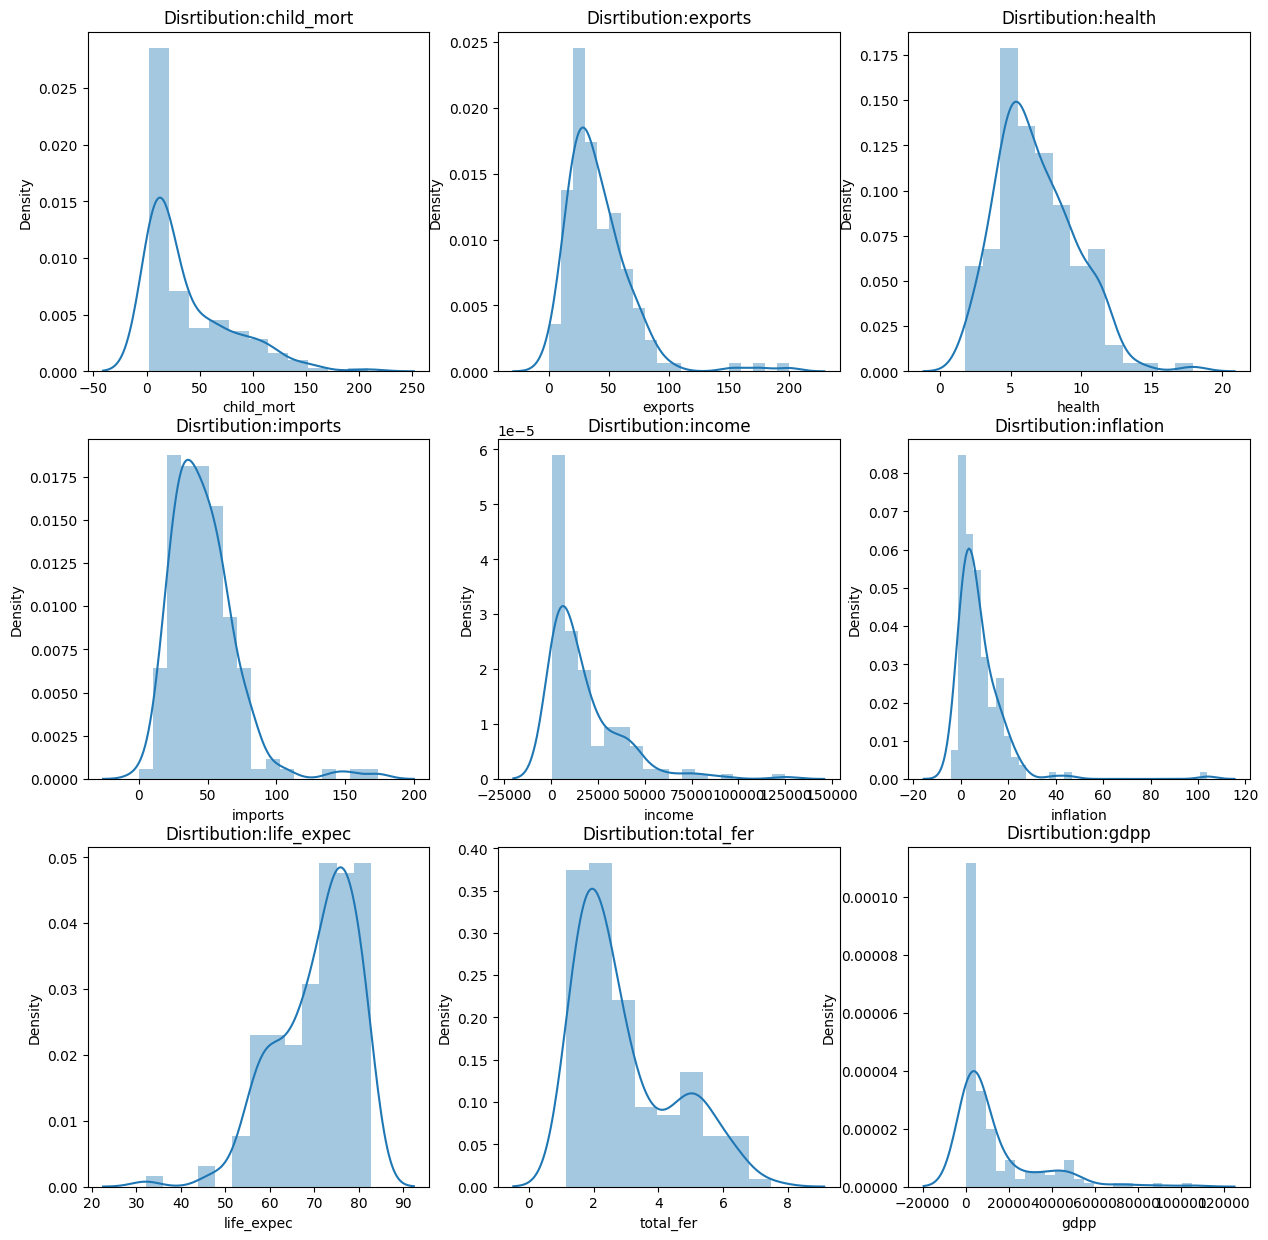

In [99]:
#Distribution of features:
fig, ax = plt.subplots(nrows =3,ncols=3,figsize=(15,15))

for i in range(len(numerical_features)):
  plt.subplot(3,3,i+1)
  sns.distplot(df[numerical_features[i]])
  title = 'Disrtibution:' + numerical_features[i]
  plt.title(title)
plt.show()

In [100]:
df['country'].shape

(167,)

# country vs Numerical Features:

**child_mort : Economically backward nations have a high infant mortality rate!**

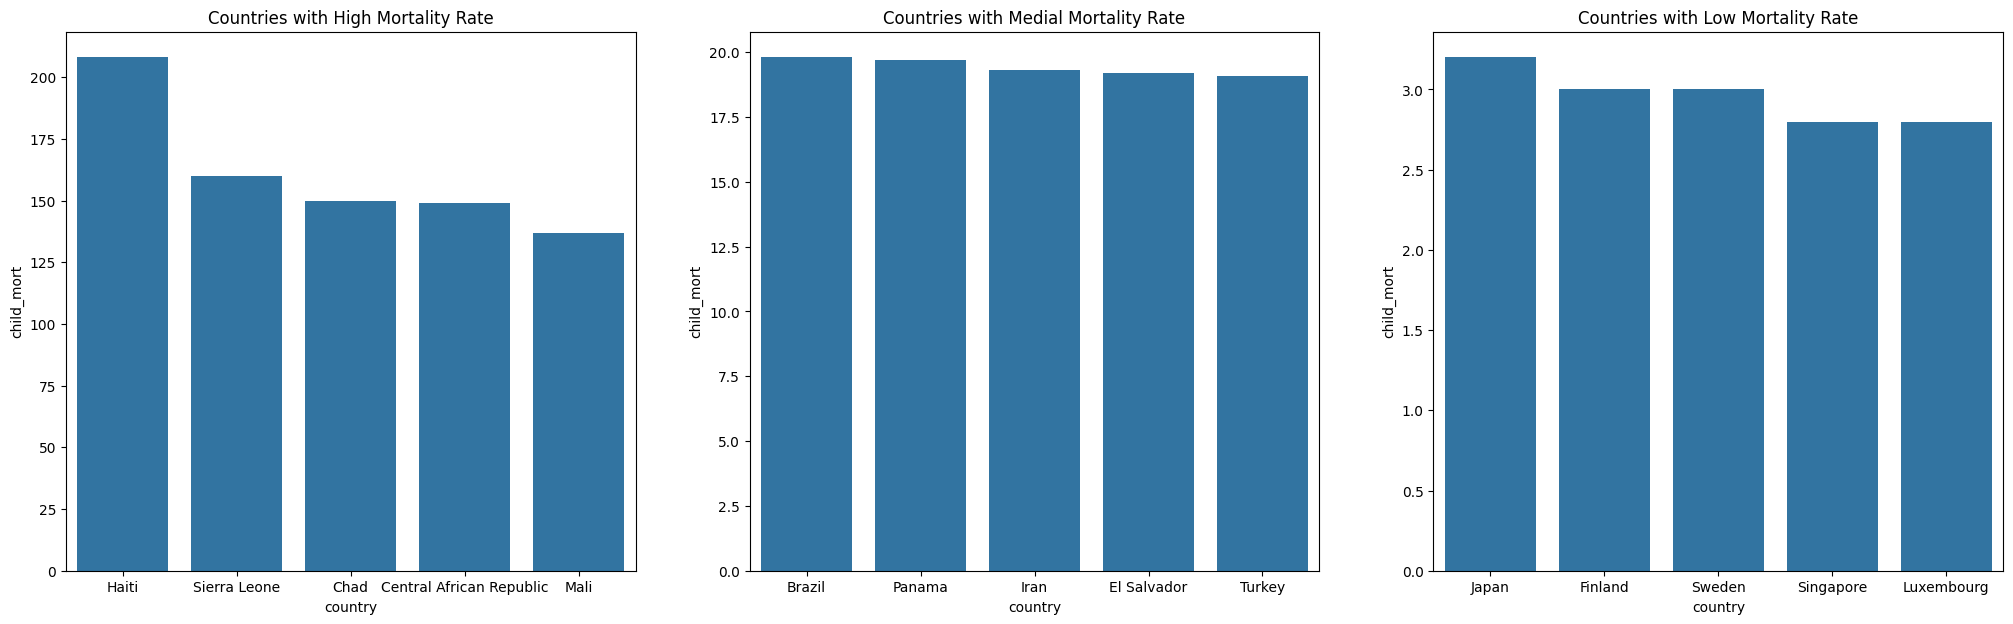

In [101]:
#Child_mortality rate vs country
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='child_mort',data = df.sort_values(ascending=False,by = 'child_mort').iloc[:5])
plt.title('Countries with High Mortality Rate')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='child_mort',data = df.sort_values(ascending=False,by = 'child_mort').iloc[81:86])
plt.title('Countries with Medial Mortality Rate')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='child_mort',data = df.sort_values(ascending=False,by = 'child_mort').iloc[161:166])
plt.title('Countries with Low Mortality Rate')
plt.show()

Haiti has the highest children's deaths. African countries have significant positions in this statistic

**exports : It is a very important factor for building the nation's economy. Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the nation!**

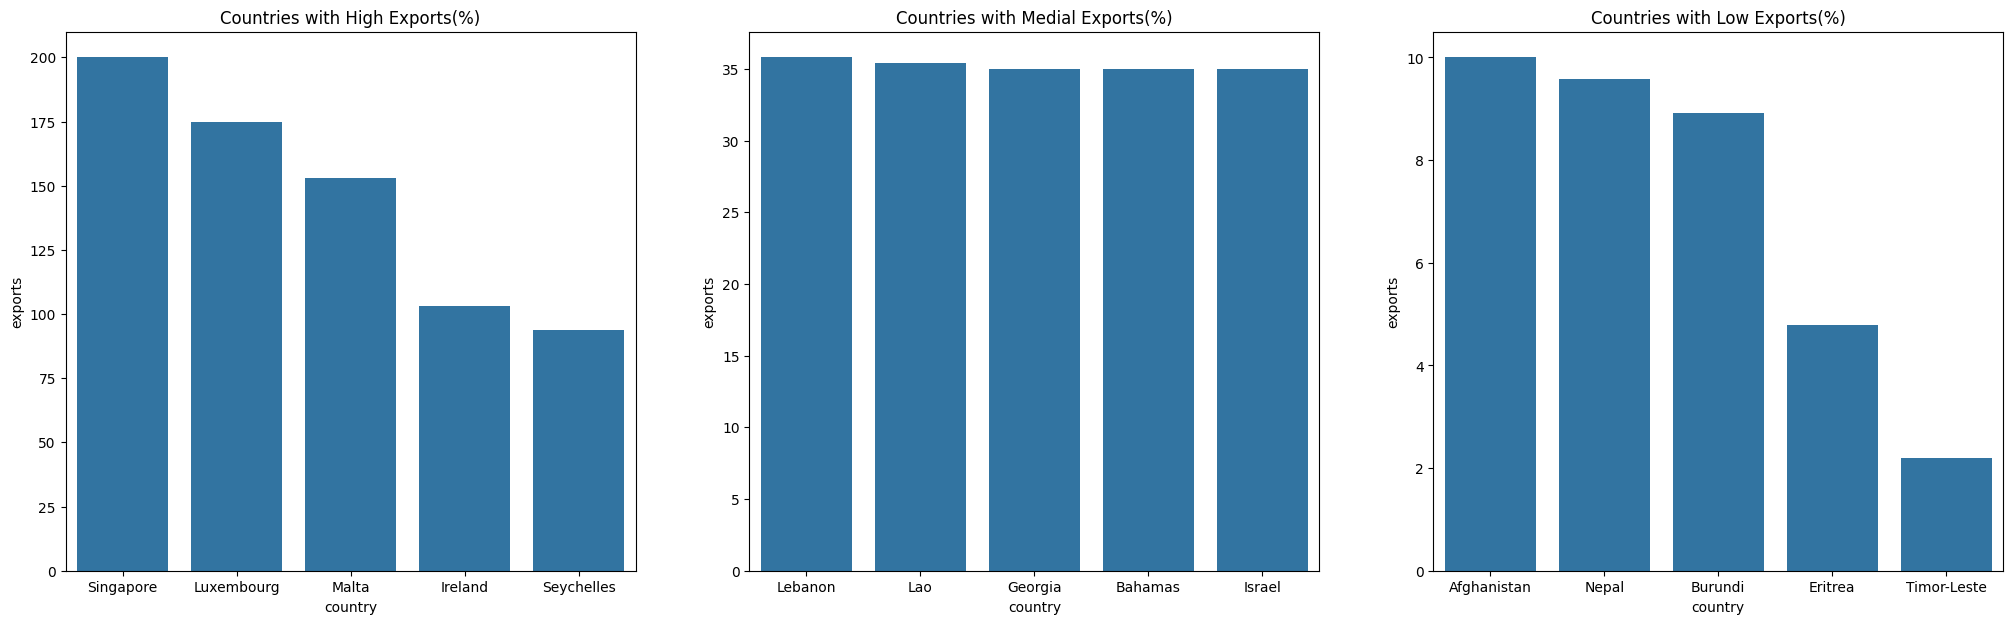

In [102]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='exports',data = df.sort_values(ascending=False,by = 'exports').iloc[:5])
plt.title('Countries with High Exports(%)')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='exports',data = df.sort_values(ascending=False,by = 'exports').iloc[81:86])
plt.title('Countries with Medial Exports(%)')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='exports',data = df.sort_values(ascending=False,by = 'exports').iloc[161:166])
plt.title('Countries with Low Exports(%)')
plt.show()

Despite Singapore's population size not being in the top 100, they have the highest number of exports. Luxembourg & Malta have probably followed the same route.
Afghanistan & Nepal are present in the lower end of exports.

**health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!**

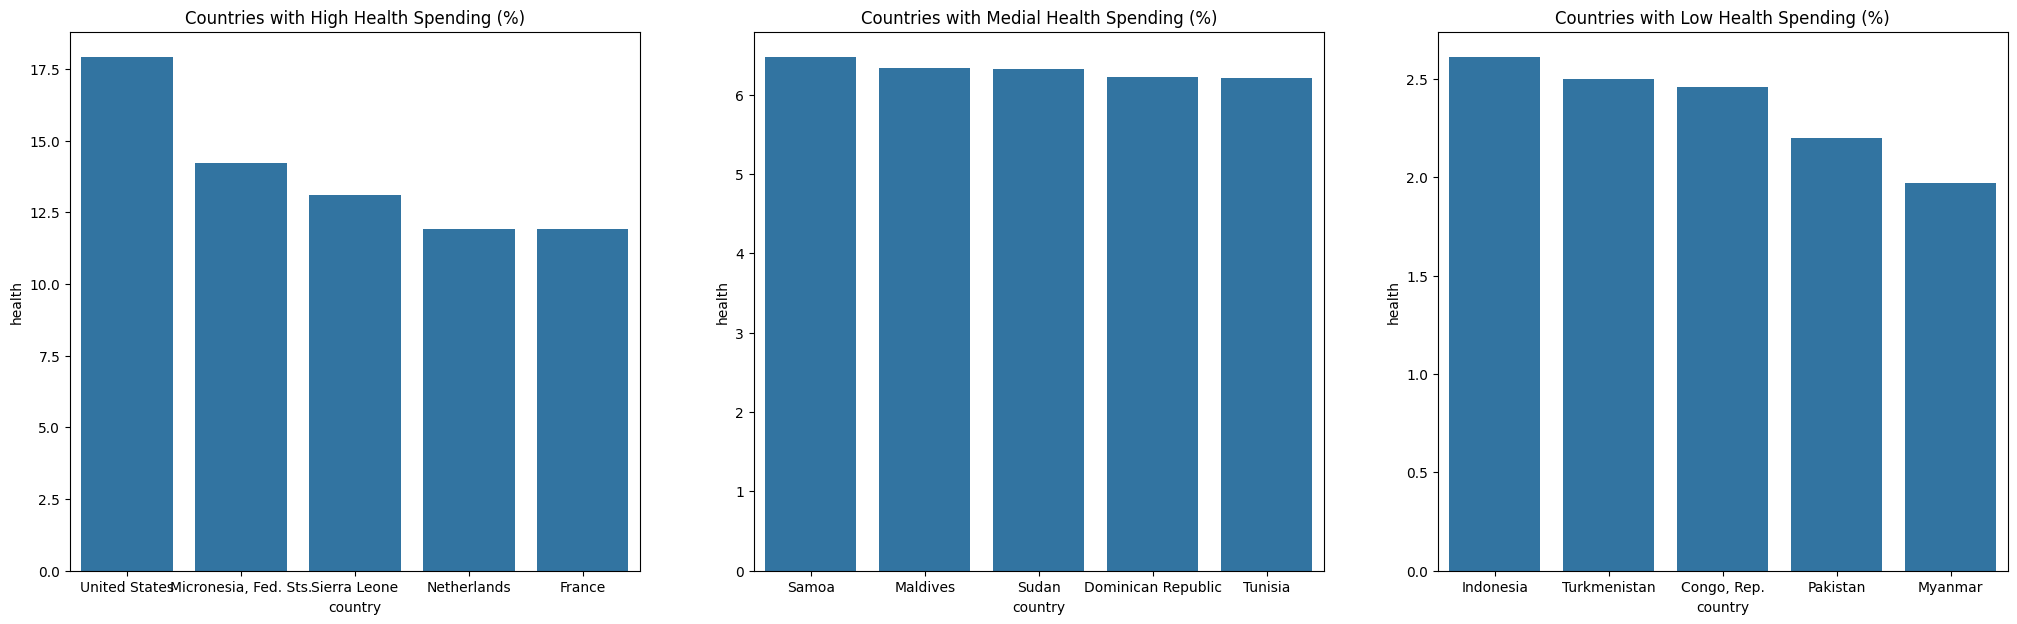

In [103]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='health',data = df.sort_values(ascending=False,by = 'health').iloc[:5])
plt.title('Countries with High Health Spending (%)')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='health',data = df.sort_values(ascending=False,by = 'health').iloc[81:86])
plt.title('Countries with Medial Health Spending (%)')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='health',data = df.sort_values(ascending=False,by = 'health').iloc[161:166])
plt.title('Countries with Low Health Spending (%)')
plt.show()

1) US stands at the top when it comes to spending on health with 17% of the individual GDP contribution.

2) 6% seems to be the mean values of the citizens spending on their health.

3) Asian countries dominate the lower end of health with less than 3%. They are the most ignorant citizens when it comes to health.

**imports : It is another attribute that determines the reliance of the nations on other nations for the goods and services!**

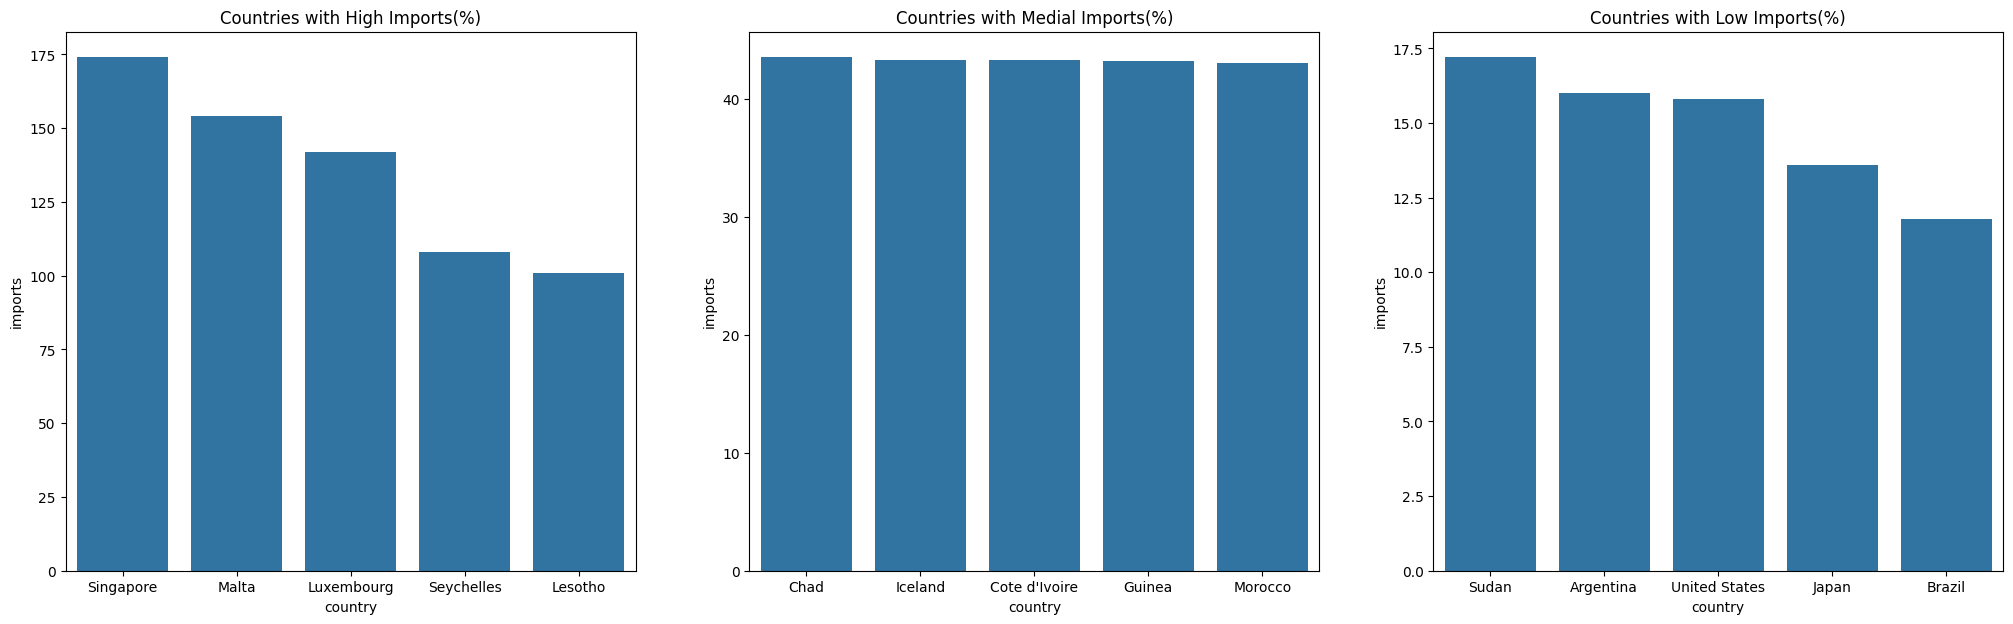

In [104]:
portsfig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='imports',data = df.sort_values(ascending=False,by = 'imports').iloc[:5])
plt.title('Countries with High Imports(%)')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='imports',data = df.sort_values(ascending=False,by = 'imports').iloc[81:86])
plt.title('Countries with Medial Imports(%)')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='imports',data = df.sort_values(ascending=False,by = 'imports').iloc[161:166])
plt.title('Countries with Low Imports(%)')
plt.show()

Singapore, Malta, Luxembourg & Seychelles are present in the top 5 of exports as well as imports. This is just an indication that highlight the nation's strategies of probably capitalizing on their resources and creating solid exports that gets countered by the heavy imports on something else. This just balances the books!

**Income : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!**

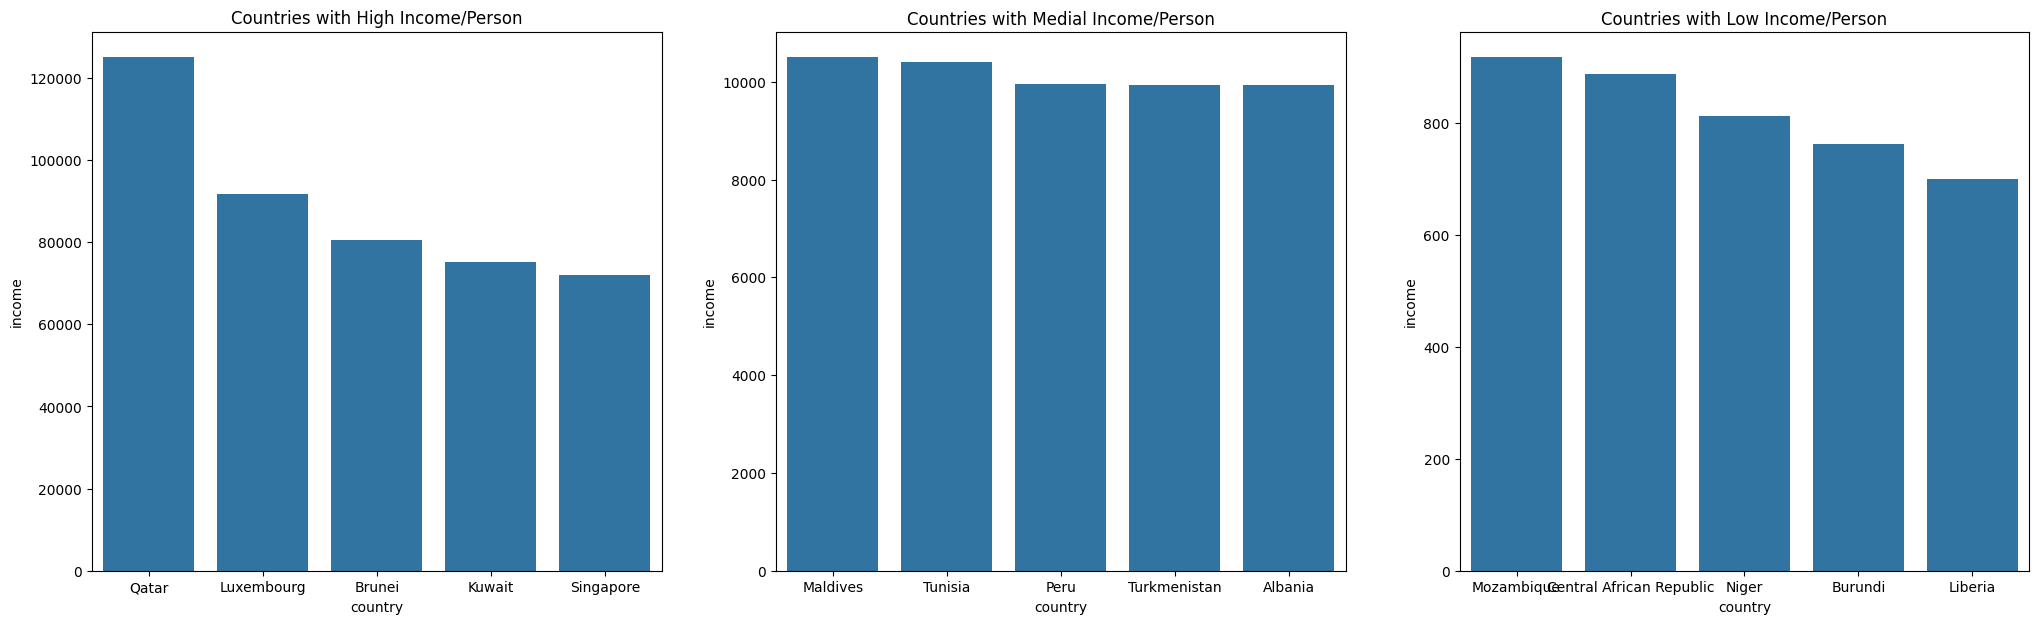

In [105]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='income',data = df.sort_values(ascending=False,by = 'income').iloc[:5])
plt.title('Countries with High Income/Person')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='income',data = df.sort_values(ascending=False,by = 'income').iloc[81:86])
plt.title('Countries with Medial Income/Person')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='income',data = df.sort_values(ascending=False,by = 'income').iloc[161:166])
plt.title('Countries with Low Income/Person')
plt.show()

Citizens of the Qatar have the highest income out of all the countries with a difference of 30k more than the 2nd placed countries. Singapore & Luxembourg are again present in the top 5 of another feature.
Lower end of the income is dominated by the African nations. This is influenced by the damage done by colonization out of which the nations have not yet recovered.

**inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!**

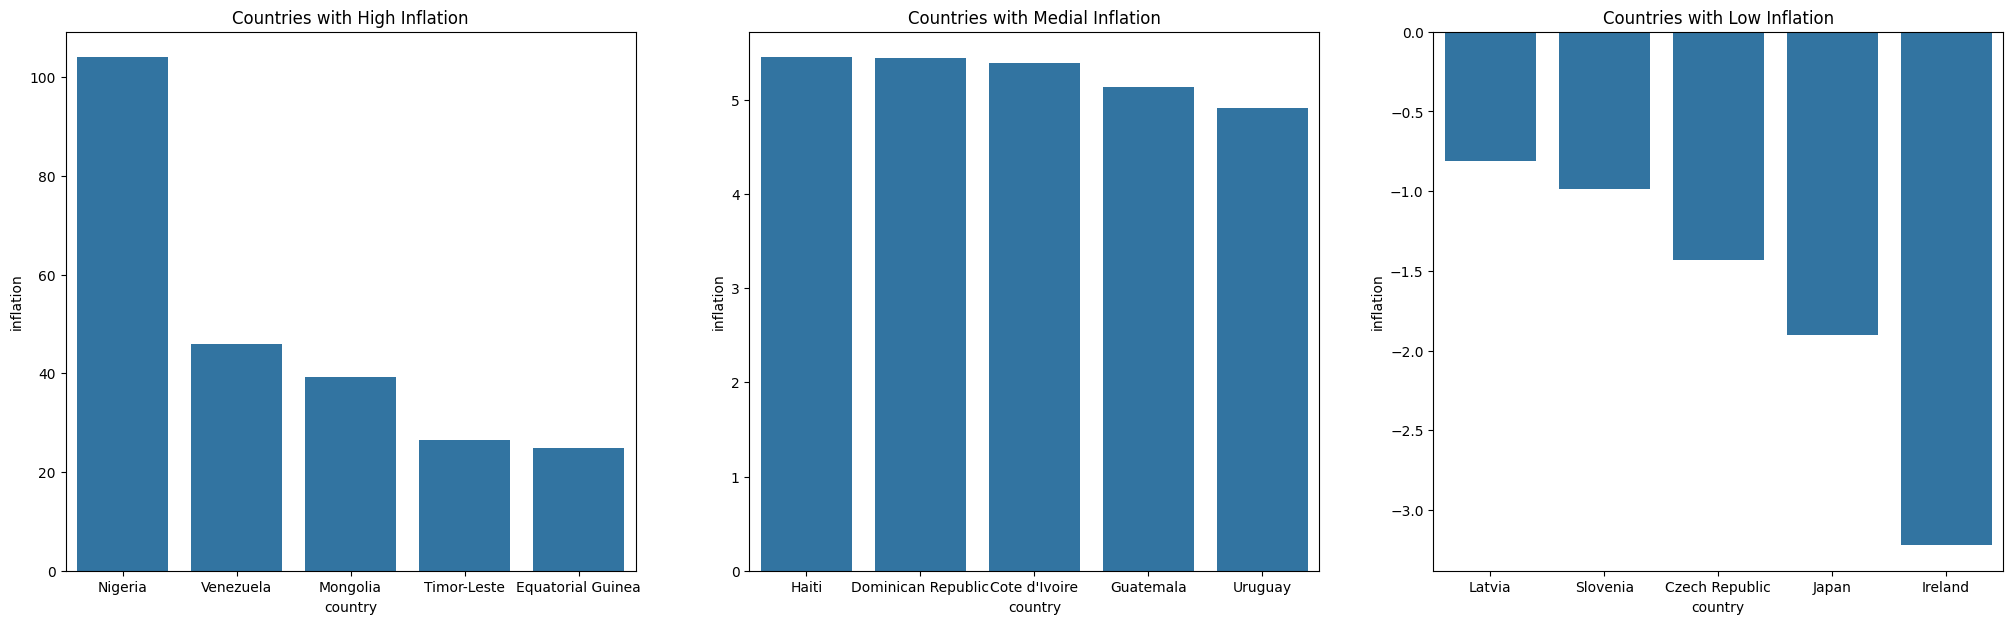

In [106]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='inflation',data = df.sort_values(ascending=False,by = 'inflation').iloc[:5])
plt.title('Countries with High Inflation')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='inflation',data = df.sort_values(ascending=False,by = 'inflation').iloc[81:86])
plt.title('Countries with Medial Inflation')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='inflation',data = df.sort_values(ascending=False,by = 'inflation').iloc[161:166])
plt.title('Countries with Low Inflation')
plt.show()

1)Higher inflation reduces the purchasing power of the citizens. Countries present at the top end of inflation have a devastating economic situation. Having such high inflation is a risk to the existence of the nation.

2)Similarly, the lower end of inflation has negative values i.e known as deflation. It signals a economy in a downward spiral leading to a recession or even a depression.

**life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!**

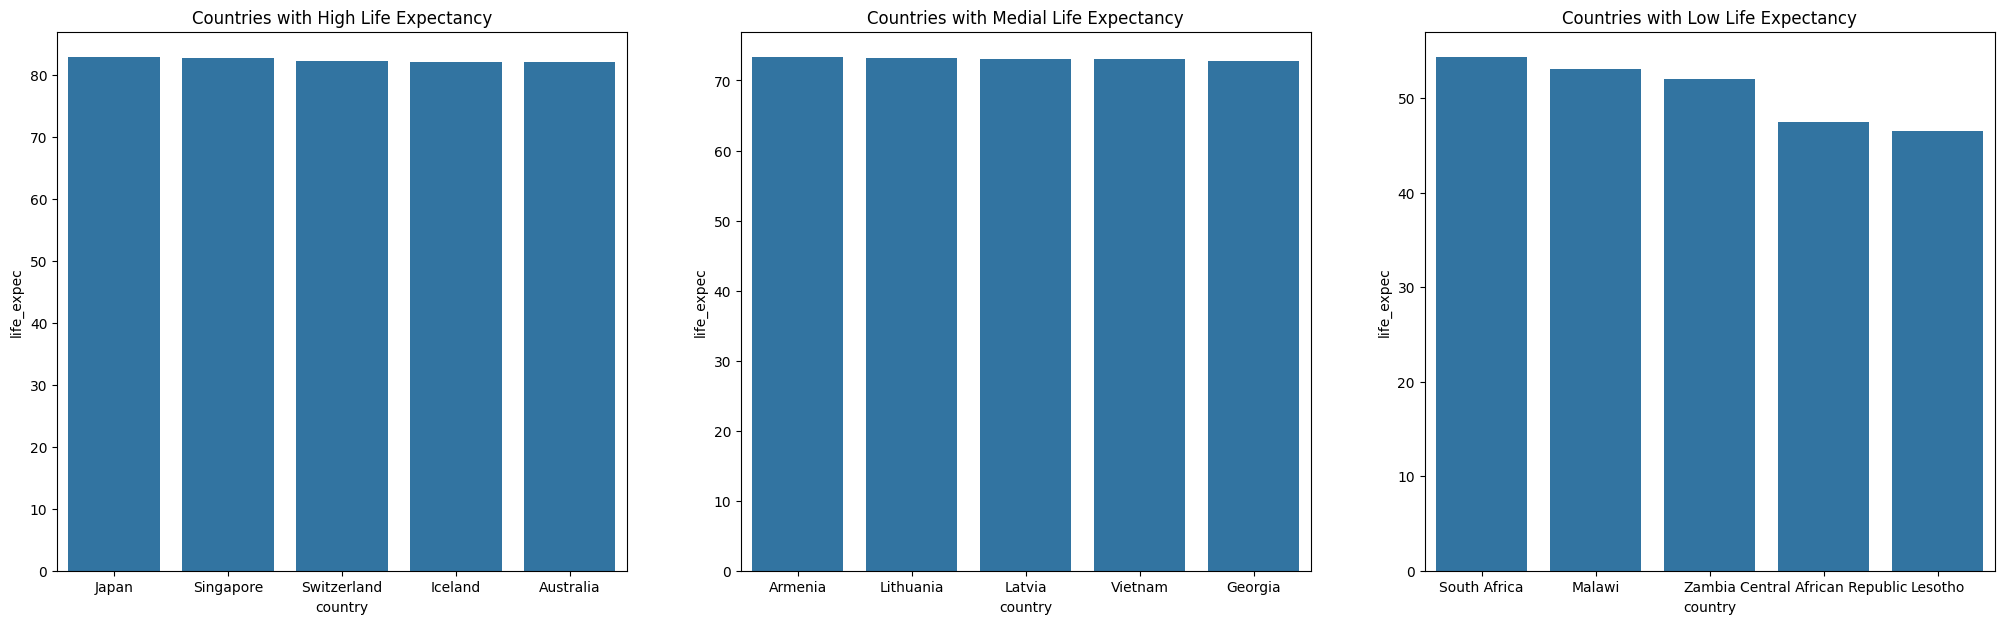

In [107]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='life_expec',data = df.sort_values(ascending=False,by = 'life_expec').iloc[:5])
plt.title('Countries with High Life Expectancy')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='life_expec',data = df.sort_values(ascending=False,by = 'life_expec').iloc[81:86])
plt.title('Countries with Medial Life Expectancy')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='life_expec',data = df.sort_values(ascending=False,by = 'life_expec').iloc[161:166])
plt.title('Countries with Low Life Expectancy')
plt.show()

1)life_expec depends alot on mental state as well as the lifestyle adopted by the citizens. Singapore is again present in the top of 5 of a feature.

2)None of the countries with a high life_expec are present in the top 5 of health that is related to the spending done by the citizen on health.

3)African countries are again present in the lower end for another feature.

**total_fer : Economically backward countries have a high fertility rate!**

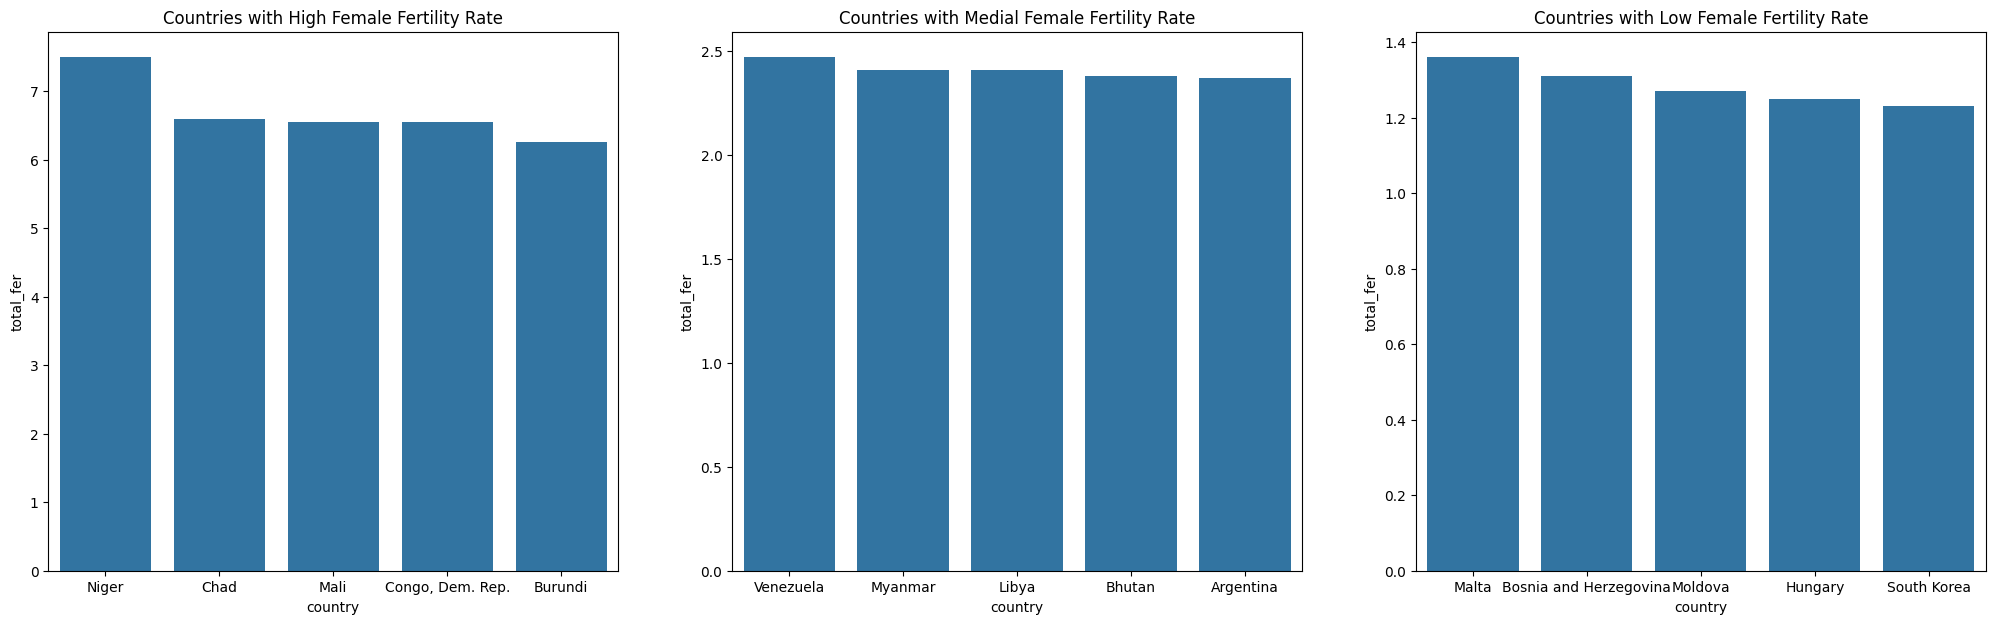

In [108]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='total_fer',data = df.sort_values(ascending=False,by = 'total_fer').iloc[:5])
plt.title('Countries with High Female Fertility Rate')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='total_fer',data = df.sort_values(ascending=False,by = 'total_fer').iloc[81:86])
plt.title('Countries with Medial Female Fertility Rate')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='total_fer',data = df.sort_values(ascending=False,by = 'total_fer').iloc[161:166])
plt.title('Countries with Low Female Fertility Rate')
plt.show()

->African countries dominate the total_fer with values 6+.

->Mean total_fer value is 2 whereas lower end values of 1 concern abit as well.

**gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!**

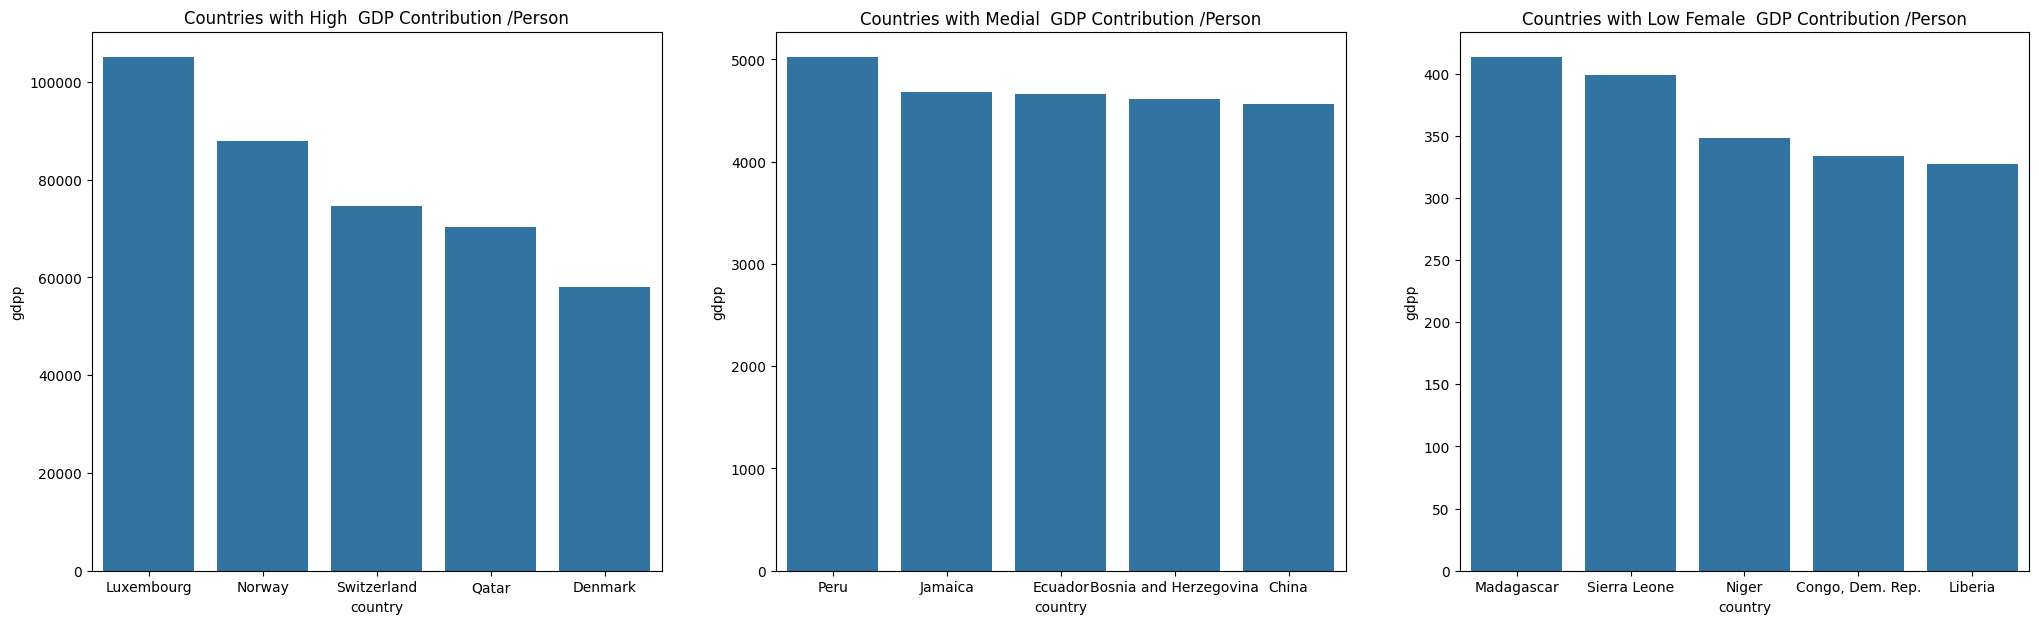

In [109]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x='country',y='gdpp',data = df.sort_values(ascending=False,by = 'gdpp').iloc[:5])
plt.title('Countries with High  GDP Contribution /Person')
plt.subplot(1,3,2)
ax = sns.barplot(x='country',y='gdpp',data = df.sort_values(ascending=False,by = 'gdpp').iloc[81:86])
plt.title('Countries with Medial  GDP Contribution /Person')
plt.subplot(1,3,3)
ax = sns.barplot(x='country',y='gdpp',data = df.sort_values(ascending=False,by = 'gdpp').iloc[161:166])
plt.title('Countries with Low Female  GDP Contribution /Person')
plt.show()

1)Luxembourg is again present in the top ranks. Switzerland & Qatar are present in the top 5 similar to income.

2)Lower end is again dominated by African nations that labels them as the economically backward.

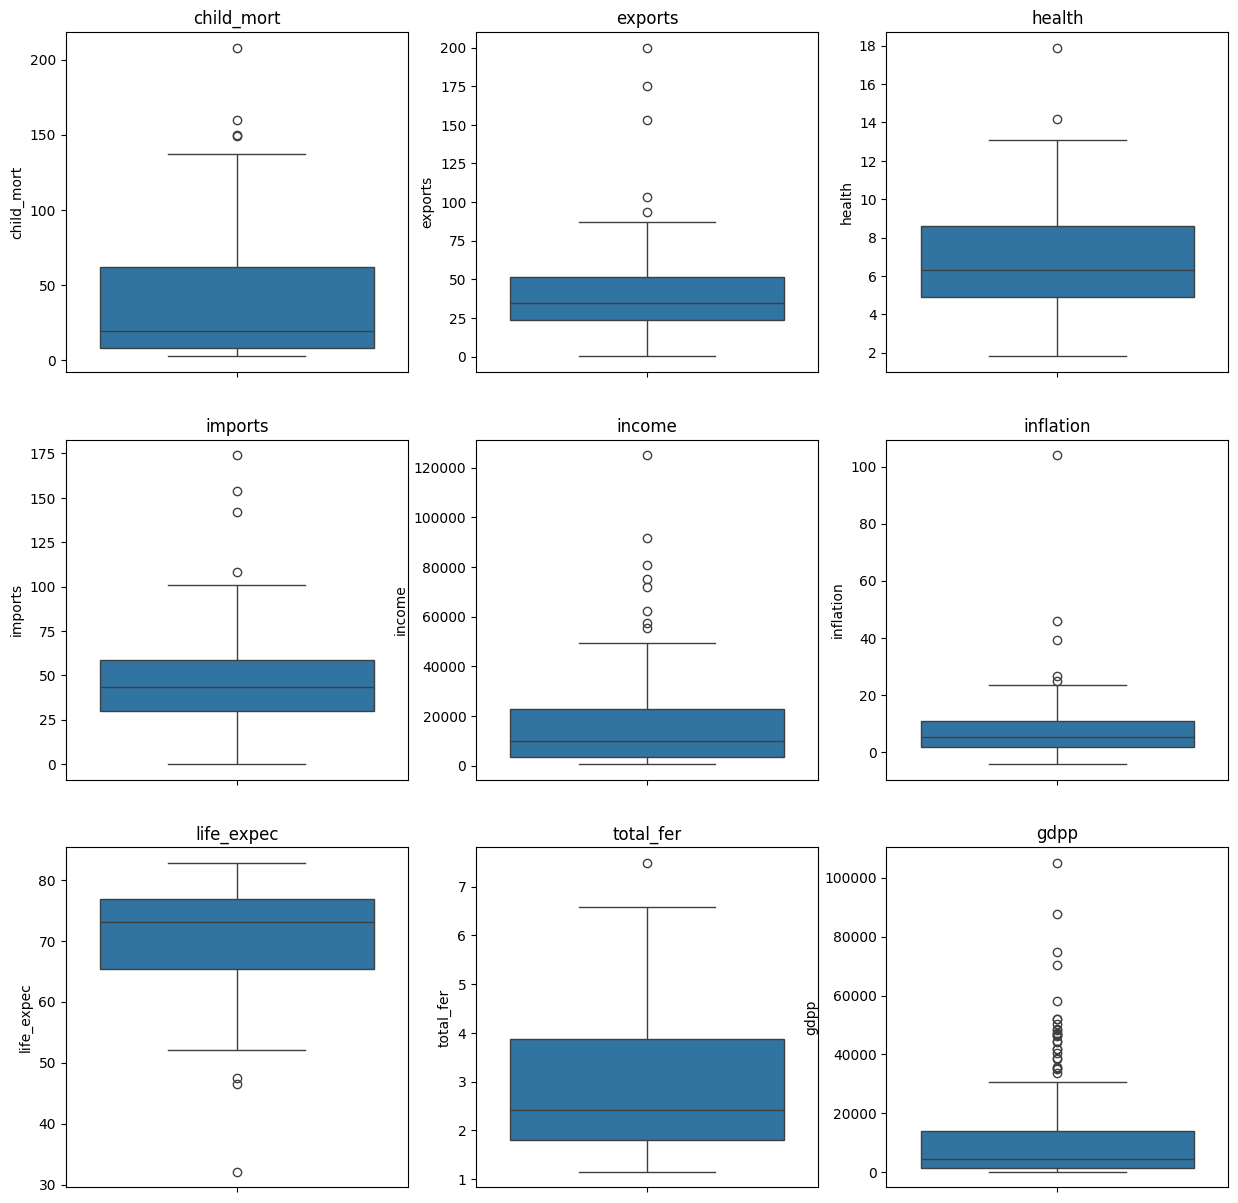

In [110]:
fig= plt.subplots(nrows =3,ncols=3,figsize=(15,15))
for i in range(len(numerical_features)):
  plt.subplot(3,3,i+1)
  ax = sns.boxplot(df[numerical_features[i]])
  plt.title(numerical_features[i])
plt.show()

# Feature Engineering

In [111]:
df1 = df[numerical_features]

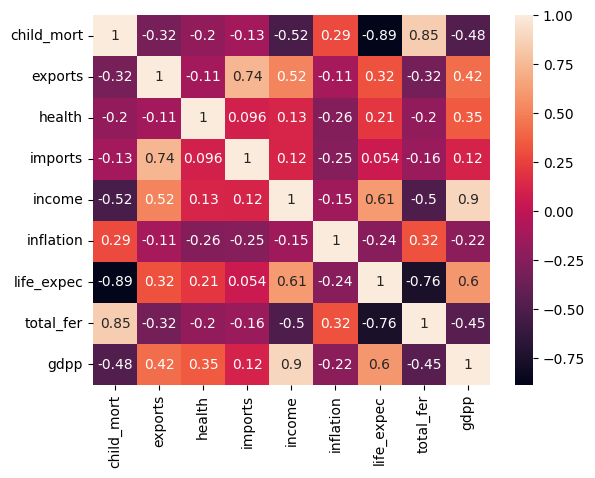

In [112]:
#correaltion matrix
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [113]:
'India' in df['country'].values

True

In [114]:
df[df['country'] == "India"]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
69,India,58.8,22.6,4.05,27.1,4410,8.98,66.2,2.6,1350



**We can clearly see that some features are essentially from the same category and they have the same reaction to other features of different category.**

The 3 categories of the features are :

1)**health : child_mort, health, life_expec, total_fer**

2)**trade : imports, exports**

3)**finance : income, inflation, gdpp**

Hence, we will dissolve these features into these categories and normalize them! **bold text**

In [115]:
df1= pd.DataFrame()
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['total_fer']/df['total_fer'].mean()) + (df['life_expec']/df['life_expec'].mean())
df1['Trade'] = (df['imports']/df['imports'].mean()) + (df['exports']/df['exports'].mean())
df1['Finance'] = (df['income']/df['income'].mean()) + (df['inflation']/df['inflation'].mean()) + (df['gdpp']/df['gdpp'].mean())
df1.head()

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150


In [116]:
#Data Scaling

In [117]:
from re import M
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])
df1.insert(loc=0, value=list(df['country']),column='Country')
df1.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


In [118]:
X = df.drop('country',axis=1)


In [119]:
#Modeling Clustring
#K-Means
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  Kmeans = KMeans(n_clusters=k,random_state=42)
  Kmeans.fit(X)
  wcss.append(Kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

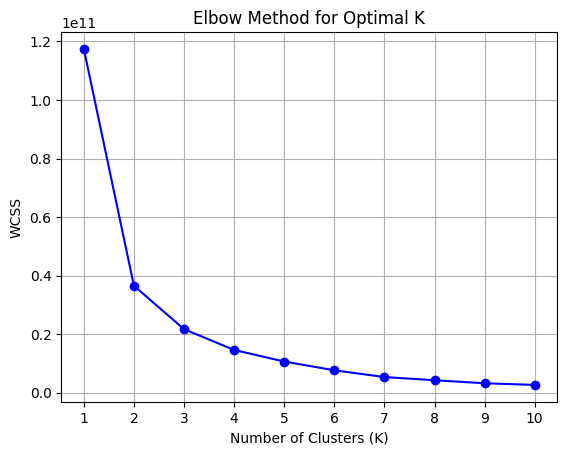

In [120]:
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

In [121]:
Kmeans = KMeans(n_clusters=3, max_iter = 1000,random_state=42)
Kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(max_iter=1000, n_clusters=3, random_state=42)

In [122]:

cluster = Kmeans.cluster_centers_
centroids = np.array(cluster)
labels = Kmeans.labels_

In [123]:
print(cluster)
print(centroids)
print(labels)

[[6.22857143e+00 9.64428571e+01 5.71285714e+00 6.85714286e+01
  8.03428571e+04 6.38871429e+00 8.02857143e+01 1.76714286e+00
  6.54428571e+04]
 [4.73898437e+01 3.58656172e+01 6.33203125e+00 4.59216086e+01
  8.56924219e+03 8.95764844e+00 6.78734375e+01 3.26335938e+00
  4.43839063e+03]
 [8.80000000e+00 4.99781250e+01 8.99156250e+00 4.60218750e+01
  3.76218750e+04 3.38331250e+00 7.91562500e+01 1.94468750e+00
  3.55875000e+04]]
[[6.22857143e+00 9.64428571e+01 5.71285714e+00 6.85714286e+01
  8.03428571e+04 6.38871429e+00 8.02857143e+01 1.76714286e+00
  6.54428571e+04]
 [4.73898437e+01 3.58656172e+01 6.33203125e+00 4.59216086e+01
  8.56924219e+03 8.95764844e+00 6.78734375e+01 3.26335938e+00
  4.43839063e+03]
 [8.80000000e+00 4.99781250e+01 8.99156250e+00 4.60218750e+01
  3.76218750e+04 3.38331250e+00 7.91562500e+01 1.94468750e+00
  3.55875000e+04]]
[1 1 1 1 1 1 1 2 2 1 2 2 1 1 1 2 1 1 1 1 1 1 1 0 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 

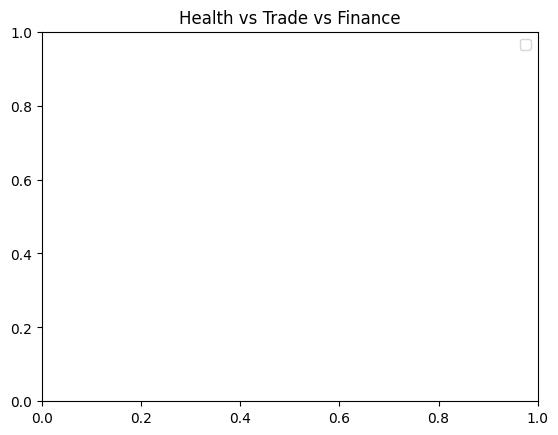

In [124]:
# Visualize the clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
df['Class'] = labels; df1['Class'] = labels
ax = Axes3D(fig)
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])

ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color='red')
ax.scatter(x, y, z, c= labels)
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.legend(['labels'])
plt.show();

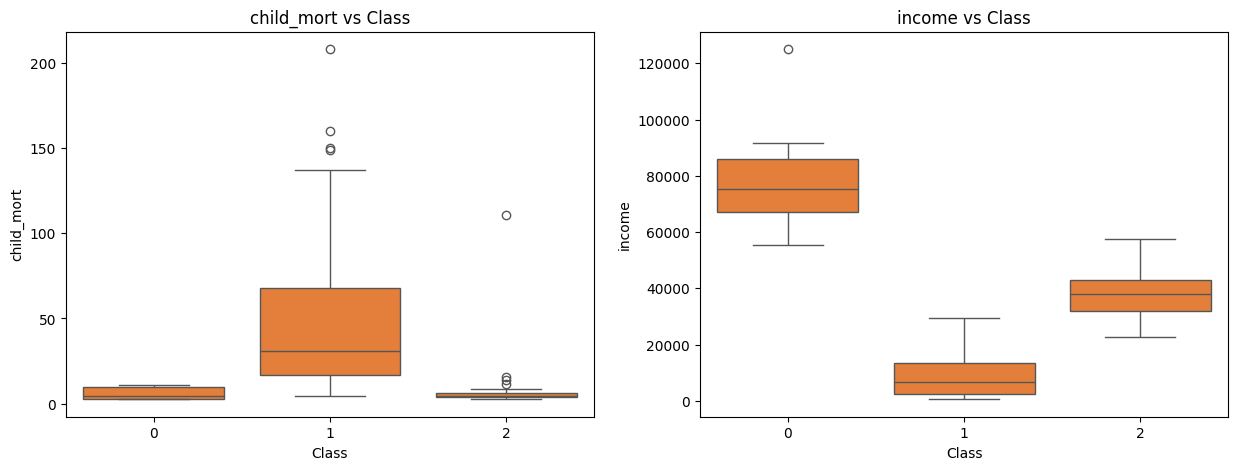

In [125]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
df['Class'] = labels; df1['Class'] = labels
plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = df, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [126]:
import plotly.express as px
!pip install -U kaleido
import kaleido

In [129]:

df1['Class'].loc[df1['Class'] == 0] = 'No Help Needed'
df1['Class'].loc[df1['Class'] == 1] = 'Help Needed'
df1['Class'].loc[df1['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(df1[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = df1['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Blue',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [128]:
#should do PCA

In [133]:
df2 = df.copy(deep = True)

col = list(df.columns)
col.remove('health'); col.remove('country')

df2['health'] = ss.fit_transform(df2[['health']]) # Standardization

for i in col:
    df2[i] = mms.fit_transform(df2[[i]]) # Normalization
df2.drop(columns = 'country',inplace = True)
df2.drop('Class',axis=1,inplace=True)
df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [134]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

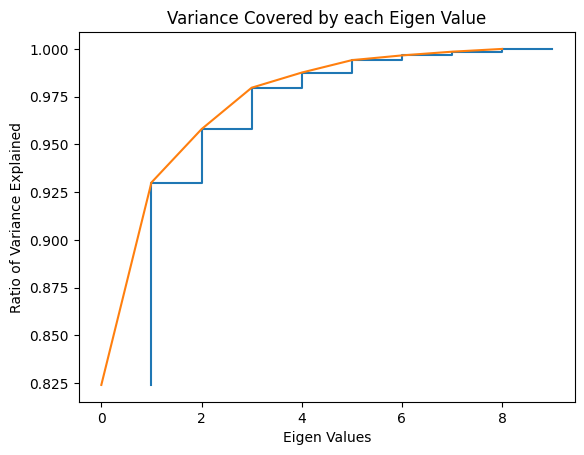

In [135]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [136]:
pca_df2 = pca_df2.drop(columns = [3,4,5,6,7,8])
pca_df2.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


In [137]:
m2 = pca_df2.values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

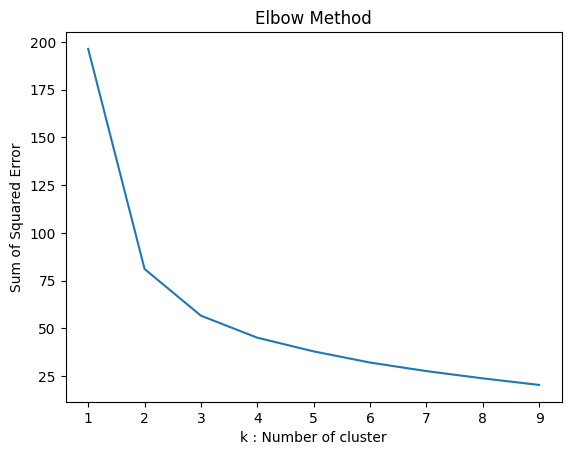

In [138]:
sse = {}
for k in range(1, 10):

  kmeans = KMeans(n_clusters=k, max_iter=1000).fit(m2)
  sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



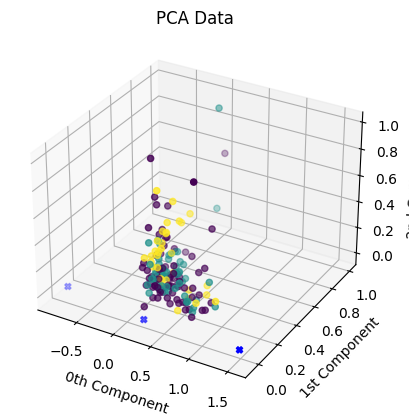

In [141]:
model = KMeans(n_clusters = 3,max_iter = 1000)
model.fit(m2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['Class'] = labels; pca_df2['Class'] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:,0],centroids[:,1],centroids[:,2],marker="X", color = 'b')
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
ax.scatter(x,y,z,c =labels)
plt.show();

We know that low income and high child mortality is a sign of an economically backward nation.

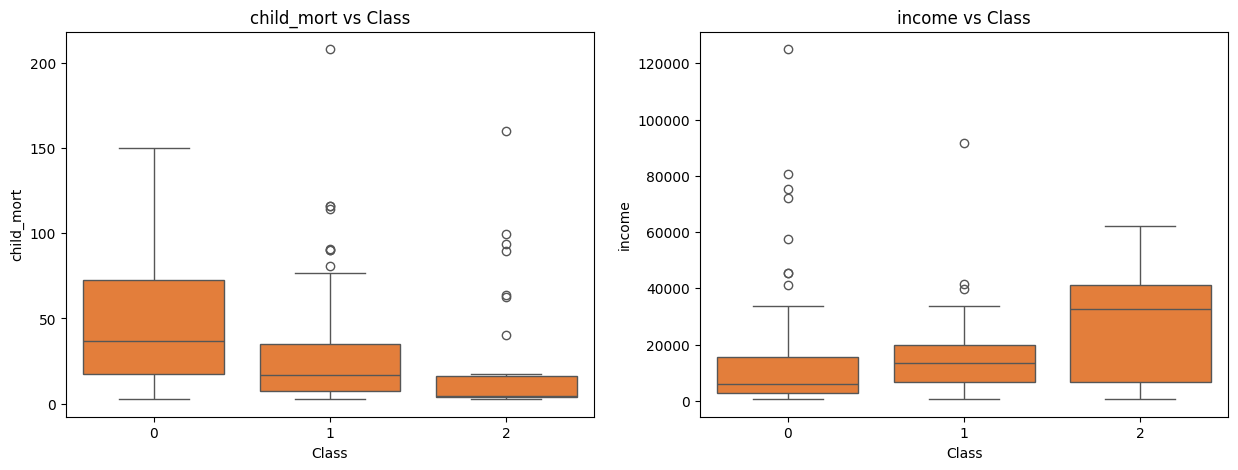

In [143]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = df, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [145]:
pca_df2.insert(0,column = 'Country', value = df['country'])

pca_df2['Class'].loc[pca_df2['Class'] == 0] = 'Might Need Help'
pca_df2['Class'].loc[pca_df2['Class'] == 1] = 'Help Needed'
pca_df2['Class'].loc[pca_df2['Class'] == 2] = 'No Help Needed'

fig = px.choropleth(pca_df2[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = pca_df2['Class'],
                    color_discrete_map = {'Help Needed':'Red',
                                          'Might Need Help':'Yellow',
                                          'No Help Needed': 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

<ipython-input-145-321f5efcf2f5>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-145-321f5efcf2f5>:3: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Might Need Help' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.

